# Study Case - Astra Credit Score
## Firli Ilhami

In [317]:
import numpy as np
import pandas as pd


In [318]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Business Understanding
Data berisi informasi terkait pelanggan kartu kredit di suatu negara pada periode Januari-Maret 2015. Informasi meliputi latar belakang pelanggan, jumlah tagihan, jumlah pembayaran, lama terlambat bayar dan status pembayaran bulan berikutnya (April 2015).

#### Tujuan Pemodelan
Dari informasi yang diberikan, perusahaan meminta untuk memprediksi apakah seorang pelanggan kartu kredit  akan terlambat membayar tagihan kartu kredit pada bulan Mei 2015 berdasarkan data pada bulan Februari-April 2015 

Karena tujuan akhirnya adalah kita ingin mengkategorikan data yang akan ditest dan sudah ada label terhadap data training sehingga akan digunakan Algoritma Machine Learning untuk klasifikasi untuk melakukan prediksi tersebut.

In [319]:
df_train=pd.read_csv('training.csv')

In [320]:
df_test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [321]:
df_train.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


# Data Understanding
Keterangan untuk setiap feature:
* ID : Nomor ID pelanggan
* LIMIT_BAL : Batas maksimal kredit pelanggan
* MARRIAGE  : status pernikahan, 1=Belum Menikah, 2=Menikah , 3=Lainnya
* EDUCATION : 1=S2/S3 , 2=Diploma/S1, 3=SMA, 4=Lainnya
* SEX       : Gender
* AGE       : Umur
* PAY_i     : terlambat membayar pada bulan ke i, i=1,2,3 dan PAY_i=n untuk n=0,1,2,4 dengan n adalah telat membayar selama n bulan
* BILL_AMTi : Tagihan untuk bulan ke i, dengan i=1,2,3
* PAY_AMTi  : Jumlah nominal yang dibayarkan pada bulan ke i, dengan i=1,2,3
* TARGET    : Terlambat membayar pada bulan ke 4 , kode 1= terlambat dan kode 0= tidak terlambat

In [322]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB


### Merubah kolom kategorikal yang bertipe non object ke object
Jika diperhatikan bahwa kolom yang datanya adalah kategorikal datanya bertipe bukan object oleh karena itu akan diubah terlebih dahulu menjadi object . Hal ini diperlukan untuk kemududahan dalam tahap modeling selanjutnya 

In [323]:
df_train[['EDUCATION','MARRIAGE','SEX','PAY_1','PAY_2','PAY_3']]=df_train[['EDUCATION','MARRIAGE','SEX','PAY_1','PAY_2','PAY_3']].astype(str)

### Memisahkan dataframe antara kategorikal dan numerik & menghapus kolom ID pada dataset

In [324]:
df_train.drop('ID',axis=1,inplace=True)
objek=['EDUCATION','MARRIAGE','SEX','PAY_1','PAY_2','PAY_3','TARGET']
numerik=df_train.drop(df_train[objek],axis=1)
kategorik=df_train[objek]
kategorik_without_target=kategorik.drop('TARGET',axis=1)

In [325]:
numerik.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,157608.781955,43.373955,50720.634827,48815.920662,46471.030556,5175.054075,4973.786105,4830.003368
std,124931.062684,8.777974,73365.449060,70753.129768,68182.984755,15033.589318,14867.362888,15646.002915
min,0.000000,20.000000,-165580.000000,-69777.000000,-61506.000000,0.000000,0.000000,0.000000
25%,50000.000000,37.000000,3491.000000,2997.000000,2550.000000,566.000000,451.000000,306.000000
50%,120000.000000,42.000000,21943.000000,20987.000000,19954.000000,2000.000000,2000.000000,1637.000000
75%,230000.000000,49.000000,65903.000000,62725.000000,59111.000000,5000.000000,4696.000000,4025.000000
max,800000.000000,72.000000,746814.000000,646770.000000,693131.000000,505000.000000,384986.000000,508229.000000


Jika dilihat di atas untuk feature LIMIT_BAL, BILL_AMT1,BILL_AMT2,BILL_AMT3 , PAY_AMT1, PAY_AMT2, PAY_AMT3 <br>
nilai antara Q3 dan nilai maksimumnya terpaut cukup jauh sehingga kemungkinan besar terdapat pencilan pada data di <br>
feature-feature tersebut , lebih jelasnya akan dilihat pada boxplotnya.

In [326]:
kategorik_without_target.describe()

,EDUCATION,MARRIAGE,SEX,PAY_1,PAY_2,PAY_3
count,16625,16625,16625,16625,16625,16625
unique,4,3,2,5,5,5
top,2,1,2,0,0,0
freq,6925,8901,9788,11715,13287,13534


## Pengecekan Missing Value
tidak terdapat Missing Value pada data yang dipunya

In [327]:
#count how much the percentage of missing value for each field
percentage = round(df_train.isnull().sum()/len(df_train)*100,2).sort_values(ascending = False)
percentage

TARGET       0.0
PAY_AMT3     0.0
PAY_AMT2     0.0
PAY_AMT1     0.0
BILL_AMT3    0.0
BILL_AMT2    0.0
BILL_AMT1    0.0
PAY_3        0.0
PAY_2        0.0
PAY_1        0.0
AGE          0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
LIMIT_BAL    0.0
dtype: float64

# Pengecekan isi data

In [328]:
for i in kategorik.columns:
    print(kategorik[i].value_counts())

2    6925
3    5359
1    4029
4     312
Name: EDUCATION, dtype: int64
1    8901
2    7519
3     205
Name: MARRIAGE, dtype: int64
2    9788
1    6837
Name: SEX, dtype: int64
0    11715
1     2309
2     2209
3      278
4      114
Name: PAY_1, dtype: int64
0    13287
2     2944
3      260
4      117
1       17
Name: PAY_2, dtype: int64
0    13534
2     2784
3      185
4      120
1        2
Name: PAY_3, dtype: int64
0    9989
1    6636
Name: TARGET, dtype: int64


## Melihat distribusi dari feature numerik

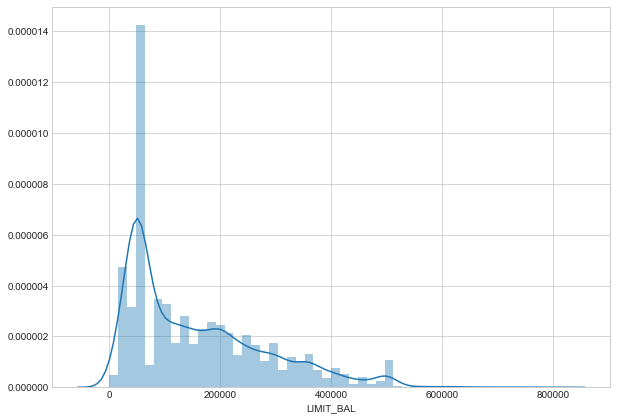

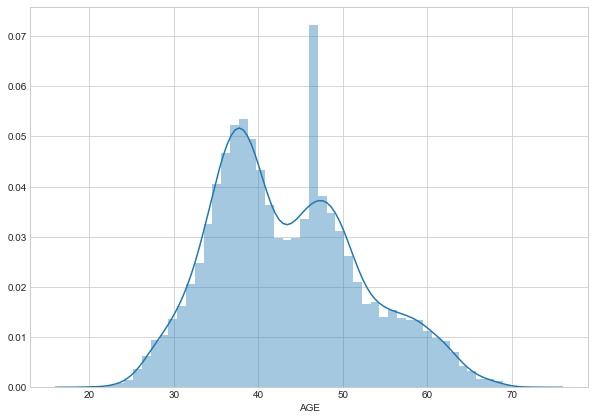

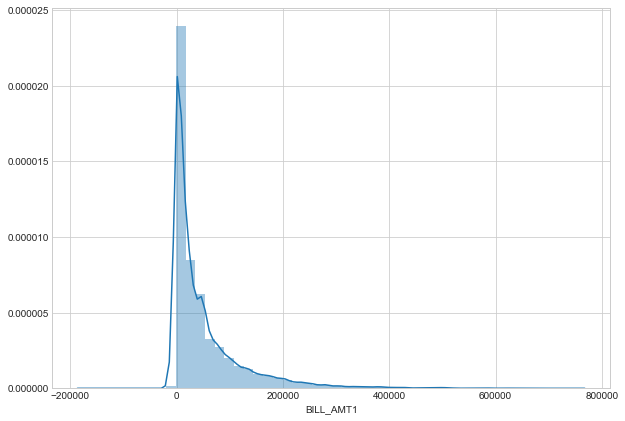

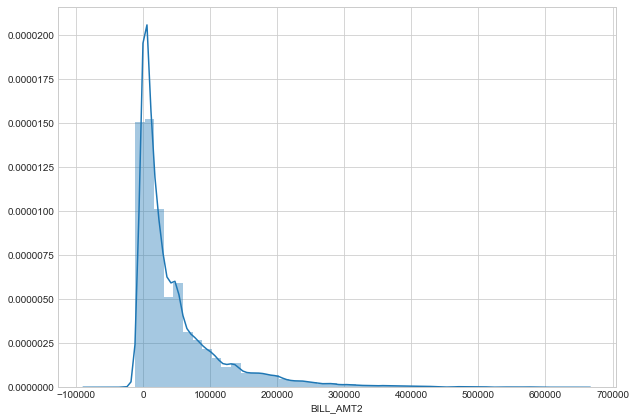

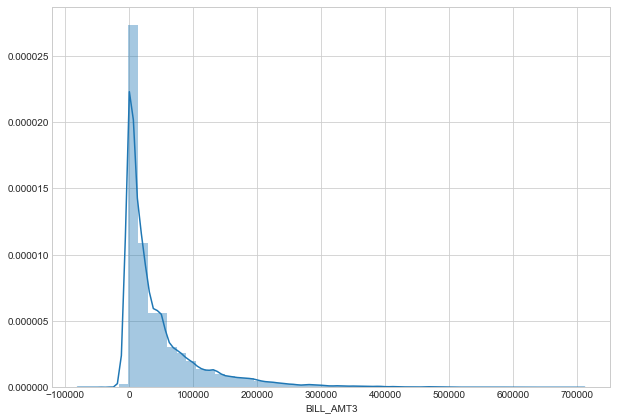

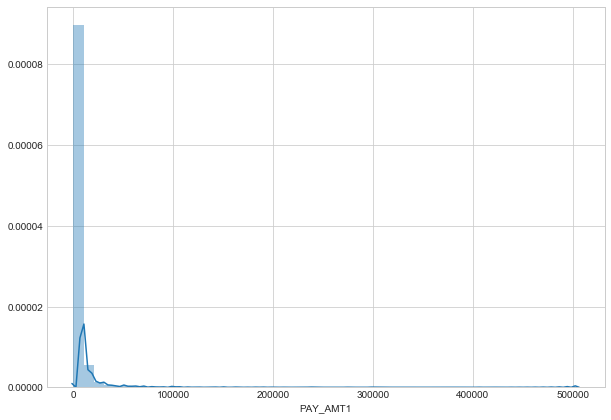

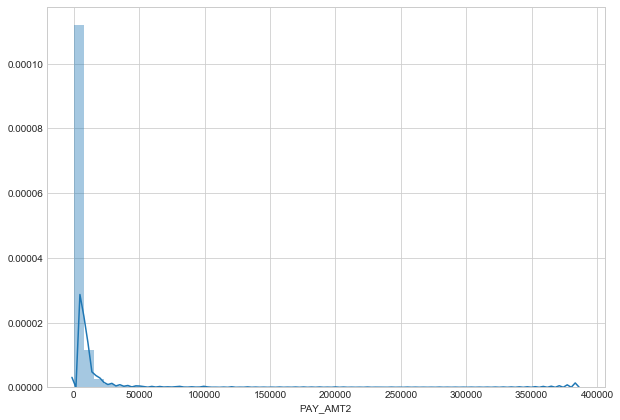

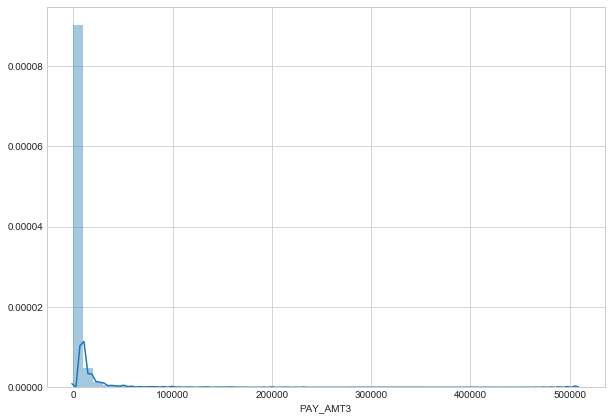

In [329]:
sns.set_style('whitegrid')
for i in range(8):
    plt.figure(figsize=(10,7))
    sns.distplot(numerik.iloc[:,i])
    plt.show()

* Untuk limit balancenya terlihat banyak yang direntang 0-100000
* Untuk distribusi umur dari pelanggan yang kredit terlihat banyak di rentang 35-50 

## Melihat outlier pada data numerik dengan boxplot

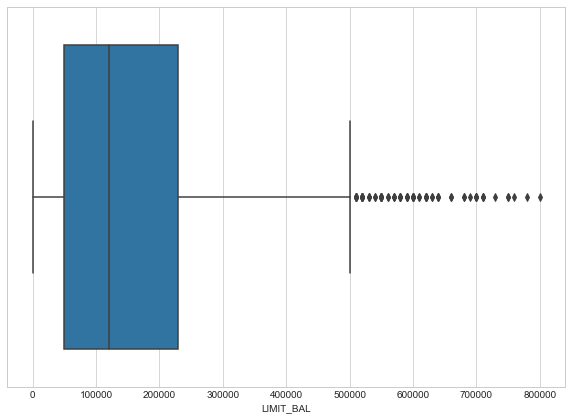

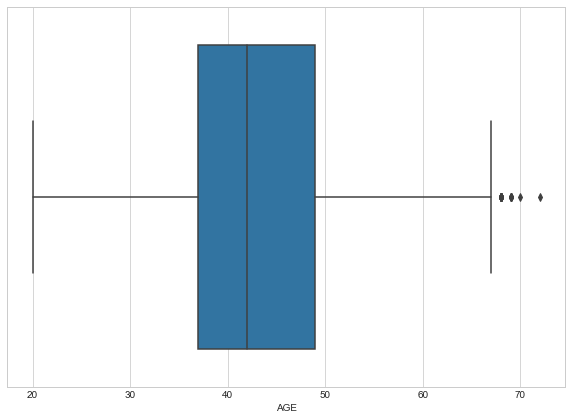

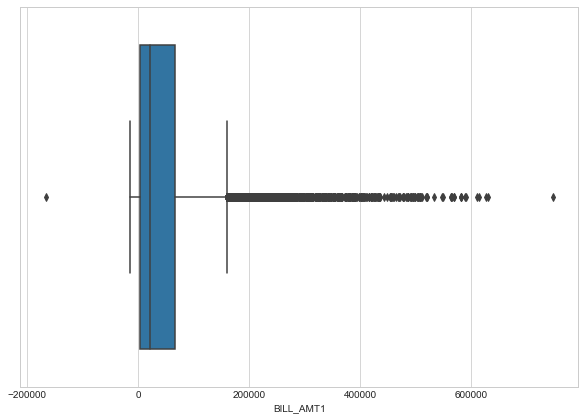

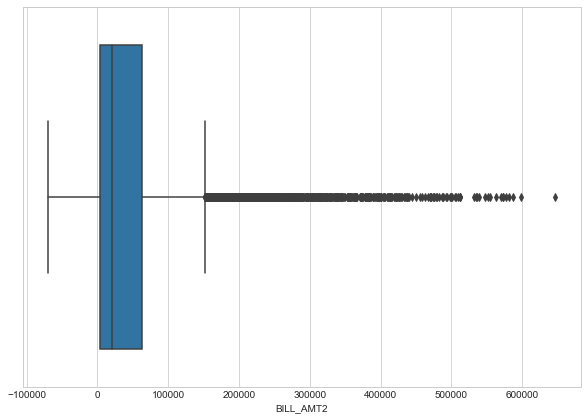

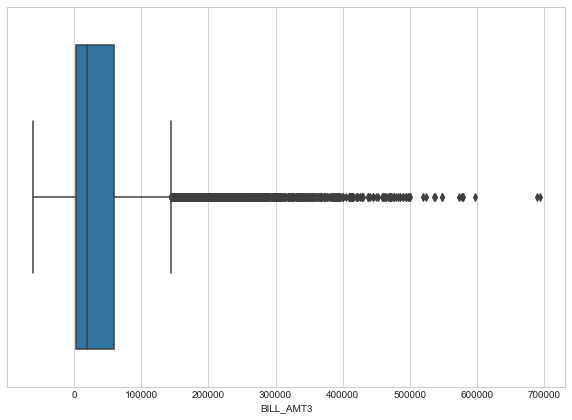

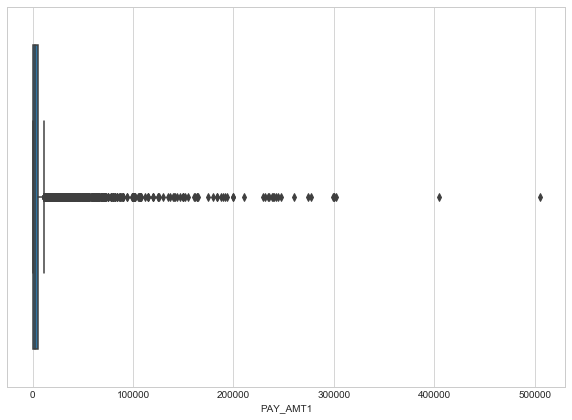

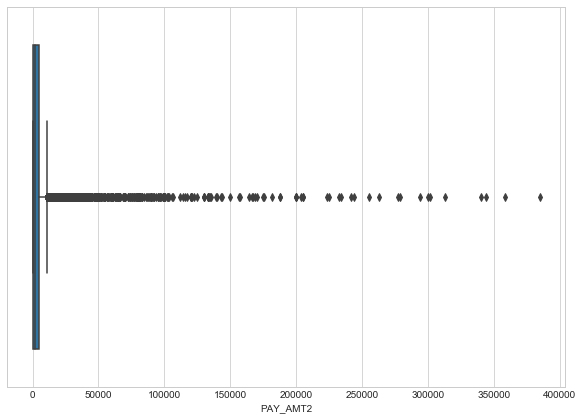

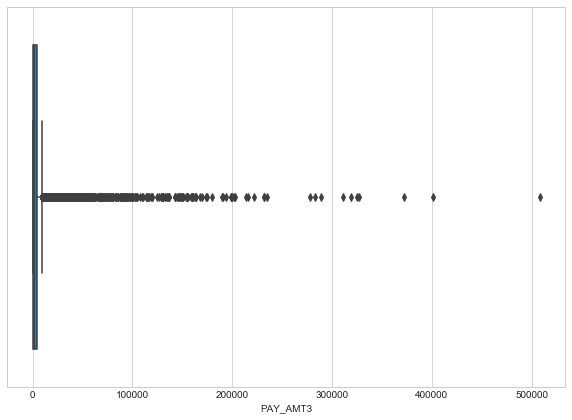

In [330]:
for i in range(8):
    plt.figure(figsize=(10,7))
    sns.boxplot(numerik.iloc[:,i])
    plt.show()

Dari boxplot terlihat setiap feature memiliki outlier/pencilan , pencilang yang paling sedikit yaitu ada di 'AGE' sedangkan untuk feature yang lain sangat banyak outlier

### Jumlah pembayaran kredit terlambat vs tidak terlambat pada bulan ke 4
Terlihat dari barplot bahwa lebih banyak yang pembayaran kreditnya tidak terlambat dibandingkan yang pembayarannya terlambat

Text(0,0.5,'Jumlah')

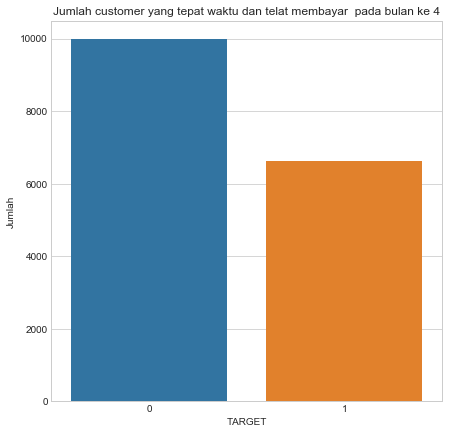

In [331]:
plt.figure(figsize=(7,7))
sns.countplot(x='TARGET',data=df_train,)
plt.title('Jumlah customer yang tepat waktu dan telat membayar  pada bulan ke 4')
plt.ylabel('Jumlah')



## Pria vs Wanita

Text(0,0.5,'Jumlah')

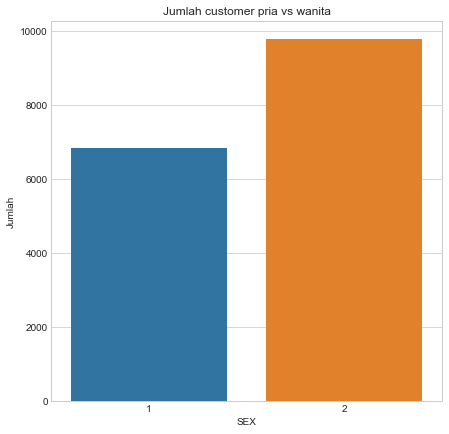

In [332]:
plt.figure(figsize=(7,7))
sns.countplot(x='SEX',data=df_train,)
plt.title('Jumlah customer pria vs wanita')
plt.ylabel('Jumlah')


sedangkan untuk jumlah wanita dan pria yang tidak telat membayar pada bulan april :

In [333]:
jp=df_train[(df_train.TARGET==0) & (df_train.SEX=='1')]['TARGET'].count()
jw=df_train[(df_train.TARGET==0) & (df_train.SEX=='2')]['TARGET'].count()
print( 'Jumlah pria yang tidak telat membayar pada bulan April '+str(jp))
print( 'Jumlah wanita yang tidak telat membayar pada bulan April '+str(jw))

Jumlah pria yang tidak telat membayar pada bulan April 3364
Jumlah wanita yang tidak telat membayar pada bulan April 6625


sekitar 50% dari jumlah pria membayar kredit tepat waktu sedangkan <br>
sedangkan sekitar 60% dari jumlah wantia membayar kredit tepat waktu


# Data Preparation

### Penghapusan feature
Pada model klasifikasi yang tidak akan digunakan feature sebagai berikut:
* feature numerik : dikarenakan berdasarkan pengamatan data bahwa berapapun besar dari tagihan atau nominal yang dibayarkan tidak terlalu mempengaruhi dari hasil keterlambatan pembayaran
* SEX : berdasarkan distribusinya pria dan wanita terhadap populasi SEX masing-masing, persentasenya tidak terlalu jauh yaitu sekitar 5:6.
* feature selain di atas akan digunakan <br>


trial adalah variabel dataframe percobaan dalam uji coba model

In [334]:
trial=df_train[['AGE','MARRIAGE','PAY_1','PAY_2','PAY_3','TARGET']]
trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 6 columns):
AGE         16625 non-null int64
MARRIAGE    16625 non-null object
PAY_1       16625 non-null object
PAY_2       16625 non-null object
PAY_3       16625 non-null object
TARGET      16625 non-null int64
dtypes: int64(2), object(4)
memory usage: 779.4+ KB


# Modeling 
Pada model kali ini akan dibandingkan 2 model yaitu model Regresi Logistik dan Random Forest

In [335]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Mentrasform column kategorikal  dengan pandas.get_dummies
Karena machine learning tidak bisa membaca data yang beruba object sehingga perlu dilakukannya transformasi data pada feature yang berupa object

In [336]:
data=pd.get_dummies(trial,drop_first=True)

### Dilakukan split pada dataset yang digunakan
Pada split kali ini akan digunakan perbanding 70:30 yaitu dimana 70% adalah data train dan 30% data test

In [337]:
y=data['TARGET']
X=data.drop('TARGET',axis=1)

In [338]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

### Pengujian dengan model REGRESI LOGISTIK

In [339]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [340]:
predictions=logmodel.predict(X_test)

### Pengujian dengan model RANDOM FOREST

In [341]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [342]:
X, y = make_classification(n_samples=1000, n_features=4)

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

## EVALUASI 

In [343]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

### Evaluasi model REGRESI LOGISTIK
* skor roc_auc memproleh nilai ~0.702 yang mana semakin mendekati 1 model dikatakan semakin baik
* dilihat dari akurasinya memperoleh nilai ~0.74 dan presisinya & recal juga bernilai ~0.74 yang mana untuk nilai akurasi, presisi dan recal semakin mendekati 1 model dikatakan semakin baik
* Berdasarkan confusion_matrix diketahui bahwa model menebak benar untuk label 0 sebanyak 2666 sedangkan untuk label 1 sebanyak 1024

In [344]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.73      0.89      0.80      3000
          1       0.75      0.52      0.61      1988

avg / total       0.74      0.74      0.73      4988



In [345]:
print(roc_auc_score(y_test,predictions))

0.701878604963112


In [346]:
print(accuracy_score(y_test,predictions))

0.7397754611066559


In [347]:
print(confusion_matrix(y_test,predictions))

[[2666  334]
 [ 964 1024]]


In [348]:
predictions=logmodel.predict(data_test)

In [349]:
tabel_prediksi=pd.Series(predictions)


### Evaluasi Model Random Forest
* skor roc_auc memproleh nilai ~0.757 yang mana semakin mendekati 1 model dikatakan semakin baik
* dilihat dari akurasinya memperoleh nilai ~0.78 dan presisinya & recal juga bernilai ~0.78 yang mana untuk nilai akurasi, presisi dan recal semakin mendekati 1 model dikatakan semakin baik
* Berdasarkan confusion_matrix diketahui bahwa model menebak benar untuk label 0 sebanyak 2632 sedangkan untuk label 1 sebanyak 1266

Berdasarkan perhitungan kebaikan model, untuk model kali ini lebih baik menggunakan model Random Forest karena nilai roc_auc lebih tinggi dibandingkan dengan hasil dari model regresi logistik

In [350]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.78      0.88      0.83      3000
          1       0.77      0.64      0.70      1988

avg / total       0.78      0.78      0.78      4988



In [351]:
print(roc_auc_score(y_test,y_pred))

0.7570771294433266


In [352]:
print(accuracy_score(y_test,y_pred))

0.7814755412991179


In [353]:
print(confusion_matrix(y_test,y_pred))

[[2632  368]
 [ 722 1266]]


## Hasil model jika menggunakan data testing
Berikut merupakan hasil dari masing-masing model apabila diterapkan untuk data testing.csv

In [354]:
df_test=pd.read_csv('testing.csv',delimiter=';')
df_test[['EDUCATION','MARRIAGE','SEX','PAY_1','PAY_2','PAY_3']]=df_test[['EDUCATION','MARRIAGE','SEX','PAY_1','PAY_2','PAY_3']].astype(str)

In [355]:
df_test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [356]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 15 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null object
EDUCATION    16625 non-null object
SEX          16625 non-null object
AGE          16625 non-null int64
PAY_1        16625 non-null object
PAY_2        16625 non-null object
PAY_3        16625 non-null object
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
dtypes: float64(7), int64(2), object(6)
memory usage: 1.9+ MB


### Model regresi logistik

In [357]:
predictions=logmodel.predict(data_test)

In [358]:
tabel_prediksi1=pd.Series(predictions)


### Model Random Forest



In [359]:
y_pred = regressor.predict(data_test)

In [360]:
tabel_prediksi2=pd.Series(y_pred)


### Perbandingan Hasil dari 2 Model untuk data testing.csv
Akan dibandingkan apakah hasil prediksi dari kedua model untuk data testing.csv

In [361]:
tabel=pd.DataFrame(list(zip(tabel_prediksi1,tabel_prediksi2)),columns=['Hasil RegLog','Hasil RanFor'])

In [362]:
tabel['Koreksi']=abs(tabel['Hasil RegLog']-tabel['Hasil RanFor'])

In [363]:
tabel.head()

,Hasil RegLog,Hasil RanFor,Koreksi
0,0,0,0
1,1,1,0
2,0,0,0
3,0,0,0
4,0,0,0


In [364]:
tabel['Koreksi'].value_counts()

0    14353
1     2272
Name: Koreksi, dtype: int64

Kolom 'Koreksi' pada tabel adalah nilai absolut dari pengurangan setiap nilai dari Hasil Regresi Logistik <br>
dengan Hasil Random Forest, <br>
yang berarti nilai :
* 0 : kedua model memprediksi hasil yang sama
* 1 : kedua model memprediksi hasil yang berbeda

Artinya kedua model memperoleh 14353 hasil prediksi yang sama untuk melabelkan apakah kartu kredit terlambat membayar atau tidak <br> 
dan memperoleh 2272  hasil prediksi yang berbeda